# <u>House Prices: Simple and elegant way of predicting house price</u>
This notebook will guide you through effective steps to submit.

* [1. Preparations](#1)
    * [1.1 Import libraries](#1.1)
    * [1.2 Load dataset](#1.2)
    * [1.3 Check data](#1.3)
    * [1.4 Combine train and test](#1.4)
* [2. Feature Engineering](#2)
    * [2.1 Transform numeric into logarithms](#2.1)
    * [2.2 Transform categorical into one-hot vector](#2.2)
* [3. Prediction and submission](#3)
    * [3.1 Format data](#3.1)
    * [3.2 Prediction](#3.2)
    * [3.3 Create submission](#3.3)

<a id="1"></a><h1 style='background:slateblue; border:.; color:white'><center>1. Preparations</center></h1>

## 1.1 Import libraries<a id="1.1"></a>
**Import all required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

## 1.2 Load dataset<a id="1.2"></a>
**Load each data as a Pandas DataFrame**

In [2]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.head()
test_id =test.Id

## 1.3 Check data<a id="1.3"></a>
**check data shape, count and dtype of each column**

In [5]:
print('=========== train infomation ===========')
train.info()
print('\n\n=========== test infomation ===========')
test.info()

=========== train infomation ===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

## 1.4 Combine train and test<a id="1.4"></a>
**Combine train and test so that you can do each future operation once**

In [6]:
data = pd.concat([train, test])
data.shape

(2919, 81)

## 1.4 fill NA<a id="1.4"></a>
use the imputer to fill the NA


In [7]:
data.shape

(2919, 81)

In [8]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)
data.isnull().sum(axis = 0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<a id="2"></a><h1 style='background:slateblue; border:.; color:white'><center>2. Feature Engineering</center></h1>

## 2.1 Transform numeric into logarithms<a id="2.1"></a>
**transform all numeric columns of the data frame into logarithms to reduce skewness**<br><br>
Approximating to a normal distribution often improves the accuracy of machine learning.<br>Logarithmic conversion reduces the range when the feature scale is large and expands it when the feature scale is small.<br>This often allows you to get closer to a mountainous distribution as if you were crushing a long-tailed distribution.

In [9]:
# current numeric data
numerics = data.loc[:,data.dtypes != 'object'].drop('Id', axis=1)
numerics['value_proposition'] = numerics['YearBuilt'] * numerics['OverallQual']
numerics['finished_basement'] = numerics['BsmtFinSF1'] > 0
numerics['garage_value'] = numerics['YearBuilt'] * numerics['GarageCars']
numerics.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0       706.0         0.0      150.0        856.0   
1          1976         0.0       978.0         0.0      284.0       1262.0   
2          2002       162.0       486.0         0.0      434.0        920.0   
3          1970         0.0       216.0         0.0      540.0        756.0   
4          2000       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0           0           61   
1       1976.0         2.0       460.0         298            0   
2       2001.0         2.0       608.0           0           42   
3       1998.0         3.0       642.0           0           35   
4       2000.0         3.0       836.0         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  value_proposition  finished_basement  garage_value  
0   208500.0              14021               True        4006.0  
1   181500.0              11856               True        3952.0  
2   223500.0              14007               True        4002.0  
3   140000.0              13405               True        5745.0  
4   250000.0              16000               True        6000.0

In [10]:
tmp = numerics.drop('SalePrice', axis = 1)
tmp.isnull().sum(axis = 0)

MSSubClass             0
LotFrontage          486
LotArea                0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea            23
BsmtFinSF1             1
BsmtFinSF2             1
BsmtUnfSF              1
TotalBsmtSF            1
1stFlrSF               0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           2
BsmtHalfBath           2
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
GarageYrBlt          159
GarageCars             1
GarageArea             1
WoodDeckSF             0
OpenPorchSF            0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
MiscVal                0
MoSold                 0
YrSold                 0
value_proposition      0
finished_basement      0
garage_value           1
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(tmp)
tmp[tmp.columns] = imp_mean.transform(tmp)
tmp.isnull().sum(axis = 0)

MSSubClass           0
LotFrontage          0
LotArea              0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           0
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt          0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
MoSold               0
YrSold               0
value_proposition    0
finished_basement    0
garage_value         0
dtype: int64

In [12]:
numerics[numerics.drop('SalePrice', axis = 1).columns] = tmp

In [13]:
numerics.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1        20.0         80.0   9600.0          6.0          8.0     1976.0   
2        60.0         68.0  11250.0          7.0          5.0     2001.0   
3        70.0         60.0   9550.0          7.0          5.0     1915.0   
4        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        2003.0       196.0       706.0         0.0      150.0        856.0   
1        1976.0         0.0       978.0         0.0      284.0       1262.0   
2        2002.0       162.0       486.0         0.0      434.0        920.0   
3        1970.0         0.0       216.0         0.0      540.0        756.0   
4        2000.0       350.0       655.0         0.0      490.0       1145.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       2.0       1.0           3.0           1.0           8.0         0.0   
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0         0.0         61.0   
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  value_proposition  finished_basement  garage_value  
0   208500.0            14021.0                1.0        4006.0  
1   181500.0            11856.0                1.0        3952.0  
2   223500.0            14007.0                1.0        4002.0  
3   140000.0            13405.0                1.0        5745.0  
4   250000.0            16000.0                1.0        6000.0

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
noyear = ~numerics.columns.str.contains('Yr|Year|SalePrice', regex=True)
noyear = numerics.columns [noyear]
print(noyear)
numerics[noyear] = scaler.fit_transform(numerics[noyear])
numerics.head

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'value_proposition', 'finished_basement',
       'garage_value'],
      dtype='object')


<bound method NDFrame.head of       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       0.235294     0.150685  0.033420     0.666667        0.500     2003.0   
1       0.000000     0.202055  0.038795     0.555556        0.875     1976.0   
2       0.235294     0.160959  0.046507     0.666667        0.500     2001.0   
3       0.294118     0.133562  0.038561     0.666667        0.500     1915.0   
4       0.235294     0.215753  0.060576     0.777778        0.500     2000.0   
...          ...          ...       ...          ...          ...        ...   
1454    0.823529     0.000000  0.002973     0.333333        0.750     1970.0   
1455    0.823529     0.000000  0.002776     0.333333        0.500     1970.0   
1456    0.000000     0.476027  0.087406     0.444444        0.750     1960.0   
1457    0.382353     0.140411  0.042726     0.444444        0.500     1992.0   
1458    0.235294     0.181507  0.038921     0.666667        0.500     1993.0   

      Yea

The skewnesses of many features are reduced by logarithmic conversion. Some skewnesses have increased, but overall it has decreased.

## 2.2 Transform categorical into one-hot vector<a id="2.2"></a>
**transform all categorical columns of the data frame into one-hot vector**<br><br>
Since GBDT treats features as numerical data, it is necessary to convert categorical data to numerical values. Label encoding is fine, but one-hot encoding often has better performance.

In [15]:
## for RF regressor no one hot encoding used
cat_cols = data.loc[:,data.dtypes == 'object'].columns
data.loc[:,cat_cols].head()
cat_data = data.loc[:, cat_cols]
cat_data.head()
for i in cat_cols.values:

    labels = cat_data[i].astype('category').cat.categories.tolist()
    replace_map_comp = {i : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    cat_data.replace(replace_map_comp, inplace=True)

cat_data = cat_data.fillna(0)
cat_data.head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0       4.0       2    0.0         4            4        1.0          5   
1       4.0       2    0.0         4            4        1.0          3   
2       4.0       2    0.0         1            4        1.0          5   
3       4.0       2    0.0         1            4        1.0          1   
4       4.0       2    0.0         1            4        1.0          3   

   LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0          1             6           3           3         1           6   
1          1            25           2           3         1           3   
2          1             6           3           3         1           6   
3          1             7           3           3         1           6   
4          1            16           3           3         1           6   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  ExterQual  \
0          2         2         13.0         14.0         2.0          3   
1          2         2          9.0          9.0         3.0          4   
2          2         2         13.0         14.0         2.0          3   
3          2         2         14.0         16.0         3.0          4   
4          2         2         13.0         14.0         2.0          3   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          5           3       3.0       4.0           4.0           3.0   
1          5           2       3.0       4.0           2.0           1.0   
2          5           3       3.0       4.0           3.0           3.0   
3          5           1       4.0       2.0           4.0           1.0   
4          5           3       3.0       4.0           1.0           3.0   

   BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0           6.0        2          1           2         5.0          3.0   
1           6.0        2          1           2         5.0          4.0   
2           6.0        2          1           2         5.0          3.0   
3           6.0        2          3           2         5.0          3.0   
4           6.0        2          1           2         5.0          3.0   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0         7.0          0.0         2.0           2.0         5.0         5.0   
1         7.0          5.0         2.0           2.0         5.0         5.0   
2         7.0          5.0         2.0           2.0         5.0         5.0   
3         7.0          3.0         6.0           3.0         5.0         5.0   
4         7.0          5.0         2.0           2.0         5.0         5.0   

   PavedDrive  PoolQC  Fence  MiscFeature  SaleType  SaleCondition  
0           3     0.0    0.0          0.0       9.0              5  
1           3     0.0    0.0          0.0       9.0              5  
2           3     0.0    0.0          0.0       9.0              5  
3           3     0.0    0.0          0.0       9.0              1  
4           3     0.0    0.0          0.0       9.0              5

<a id="3"></a>
<h1 style='background:slateblue; border:.; color:white'><center>3. Prediction and submission</center></h1>

## 3.1 Format data<a id="3.1"></a>
**Format data for training**

In [16]:
# merge categorical and numeric columns
optimized_data = pd.concat([data['Id'], cat_data, numerics], axis=1)
optimized_data.head()
# split data into X_train, y_train and test
train = optimized_data[:train.shape[0]]
test = optimized_data[train.shape[0]:].drop(['Id', 'SalePrice'], axis=1)
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']

> ## 3.2 learn and Prediction<a id="3.2"></a>
**fit and predict using lightGBM**

In [17]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [18]:
def set_seed(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    

SEED = 42
set_seed(SEED)



In [19]:
# train
%time


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110,120,130,140,150],
    'max_features': [2, 3,4,5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 25, 50, 100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
model_rf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


model_rf.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_rf.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_rf.best_score_:.3f}'
)
print(model_rf.get_params())
print('-----')


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
Fitting 5 folds for each of 2688 candidates, totalling 13440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 36.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

-----
Best parameters {'bootstrap': True, 'max_depth': 120, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
Mean cross-validated accuracy score of the best_estimator: 0.851
{'cv': 5, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': None, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'bootstrap': [True], 'max_depth': [80, 90, 100, 110, 120, 130, 140, 150], '

In [20]:
from sklearn.linear_model import ElasticNet
# Create the parameter grid based on the results of random search 
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

elastic_net = ElasticNet()

# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.001,0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

# Instantiate the grid search model
model_glm = GridSearchCV(estimator = elastic_net, 
                   param_grid = param_grid, 
                    cv = 5, n_jobs = -1, verbose = 2)


model_glm.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_glm.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_glm.best_score_:.3f}'
)
print(model_glm.get_params())
print('-----')

Fitting 5 folds for each of 91 candidates, totalling 455 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:    6.3s


-----
Best parameters {'alpha': 0.01, 'l1_ratio': 0.7}
Mean cross-validated accuracy score of the best_estimator: 0.823
{'cv': 5, 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__l1_ratio': 0.5, 'estimator__max_iter': 1000, 'estimator__normalize': False, 'estimator__positive': False, 'estimator__precompute': False, 'estimator__random_state': None, 'estimator__selection': 'cyclic', 'estimator__tol': 0.0001, 'estimator__warm_start': False, 'estimator': ElasticNet(), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'l1_ratio': [0, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 2}
-----


[Parallel(n_jobs=-1)]: Done 455 out of 455 | elapsed:    7.2s finished


In [21]:
# Various hyper-parameters to tune
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'learning_rate': [.01,.03, 0.05, .07], #so called `eta` value
              'max_depth': [3,4,5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_xgb = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        verbose=True)


model_xgb.fit(X_train, y_train)

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_xgb.best_score_:.3f}'
)
print(model_xgb.get_params())
print('-----')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


[18:30:17] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:30:17] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:30:18] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
-----
Best parameters {'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Mean cross-validated accuracy score of the best_estimator: 0.896
{'cv': 5, 'error_score': nan, 'estimator__objective': 'reg:squarederror', 'estimator__base_score': None, 'estimator__booster': None, 'estimator__colsample_bylevel': None, 'estimator_

> ## 3.3 Create submission<a id="3.3"></a>
**convert prediction into exponent and export CSV file**

Here we are taking a look into the prediction on the training data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dc4d01650>,
      dtype=object)

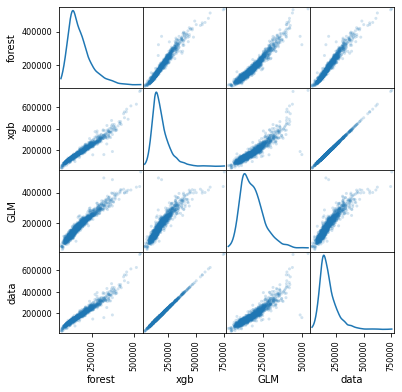

In [22]:
from pandas.plotting import scatter_matrix

forest_train_pred = model_rf.predict(X_train)
xgb_train_pred = model_xgb.predict(X_train)
lgbm_train_pred = model_glm.predict(X_train)


base_pred = pd.DataFrame({
    'forest':forest_train_pred.ravel(), 
    'xgb':xgb_train_pred.ravel(), 
    'GLM': lgbm_train_pred.ravel(),
    'data': y_train

})
scatter_matrix(base_pred, alpha=0.2, figsize=(6, 6), diagonal='kde')




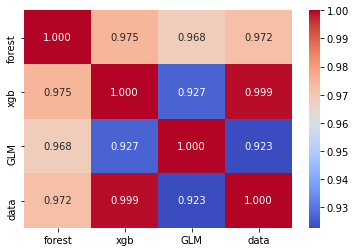

In [23]:
g = sns.heatmap(base_pred.corr(),annot=True, fmt = ".3f", cmap = "coolwarm" )

In [24]:
base_pred.columns.values

array(['forest', 'xgb', 'GLM', 'data'], dtype=object)

In [25]:
base_pred = pd.DataFrame({
    'forest':forest_train_pred.ravel(), 
    'xgb':xgb_train_pred.ravel(), 
    'GLM': lgbm_train_pred.ravel()
})

In [26]:
def create_submission(model, X_test, test_house_id, model_name):
    y_pred_test = model.predict(X_test)
    submission = pd.DataFrame(
        {
            'Id': test_house_id, 
            'SalePrice': y_pred_test,
        }
    )
    print(model_name)
    print(submission.head())
    submission.to_csv(f"submission_{model_name}.csv", index=False)
    return submission

In [27]:
# convert logarithms into exponent

pred_glm = create_submission(model_glm, test[X_train.columns], test_id.values, 'glm')
pred_xgboost = create_submission(model_xgb, test[X_train.columns], test_id.values, 'xgboost')
pred_rf = create_submission(model_rf, test[X_train.columns], test_id.values, 'rf')



glm
     Id      SalePrice
0  1461  110766.720831
1  1462  150600.279385
2  1463  170381.452114
3  1464  187726.072339
4  1465  189165.069195
xgboost
     Id      SalePrice
0  1461  125123.835938
1  1462  160215.156250
2  1463  188872.765625
3  1464  195702.953125
4  1465  182716.156250
rf
     Id      SalePrice
0  1461  128993.508475
1  1462  151550.645071
2  1463  183205.856601
3  1464  187642.375970
4  1465  194355.535793


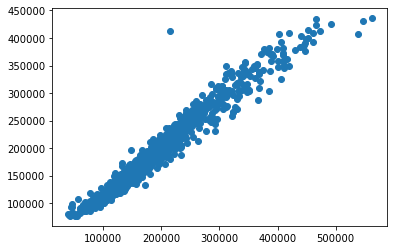

In [28]:
plt.scatter(pred_xgboost.SalePrice.values,pred_rf.SalePrice.values)

This notebook has a score of 0.13142 and is in the top 30%.<br>Based on this notebook, Feature engineering, Hyper-parameter tuning and ensemble will give you a better score.

In [29]:
pred_xgboost.head()

Id      SalePrice
0  1461  125123.835938
1  1462  160215.156250
2  1463  188872.765625
3  1464  195702.953125
4  1465  182716.156250

taking a look at correlation of prediction in the test set

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d94186b90>,
      dtype=object)

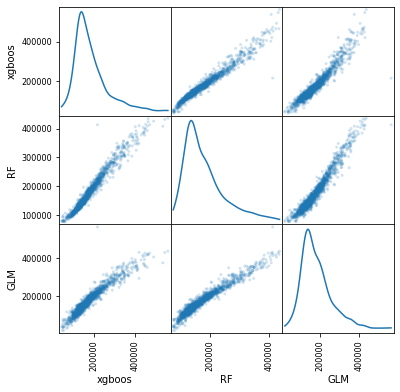

In [30]:
from pandas.plotting import scatter_matrix
test_pred = pd.concat([pred_xgboost.SalePrice,
                         pred_rf.SalePrice, 
                         pred_glm.SalePrice], axis=1)
test_pred.columns = ['xgboos', 'RF', 'GLM']
scatter_matrix(test_pred, alpha=0.2, figsize=(6, 6), diagonal='kde')


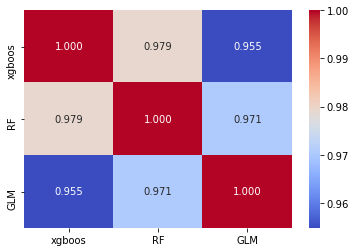

In [31]:
g = sns.heatmap(test_pred.corr(),annot=True, fmt = ".3f", cmap = "coolwarm" )

New prediction using ensemble of 3 different models predictions:

In [32]:
base_pred.shape

(1460, 3)

In [33]:
%%time
# from sklearn.svm import SVR
## SVR proved to be very slow

# param = {'kernel' : ['linear'],
#          'C' : [1,5,10],'degree' : [1,3,5],
# #          'coef0' : [0.01,.1,1,10,0.5],
#          'gamma' : ['auto','scale']},

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110,120,130,140,150],
    'max_features': [2, 3,4,5]
}
# Create a based model
rf = RandomForestRegressor()
final_model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)

final_model.fit(base_pred, y_train)

print(final_model.best_score_)
# print(accuracy_score(y_val, model_xgb.predict(X_val)))
print(final_model.best_params_)
print(final_model.best_estimator_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   16.2s finished


0.9971025203654665
{'bootstrap': True, 'max_depth': 150, 'max_features': 3}
RandomForestRegressor(max_depth=150, max_features=3)
CPU times: user 1.51 s, sys: 46.2 ms, total: 1.56 s
Wall time: 16.8 s


In [34]:
final_pred = final_model.predict(test_pred)
submission = pd.DataFrame(
    { 
        'Id': test_id, 
        'SalePrice': final_pred
    }
)

submission.to_csv("submission_final.csv", index=False)